In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import pickle

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target
df.loc[df.diagnosis==0,'diagnosis'] = -1
df.loc[df.diagnosis==1,'diagnosis'] = 0
df.loc[df.diagnosis==-1,'diagnosis'] = 1
df.to_csv("cancer.csv", index=False)

In [27]:
X_

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


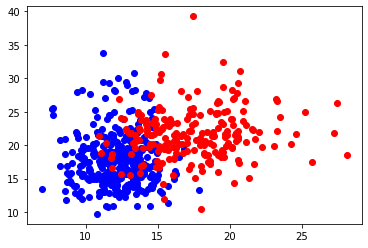

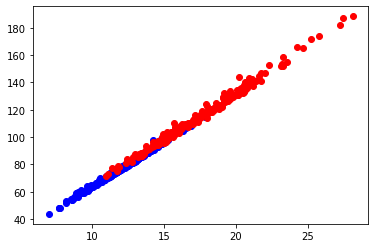

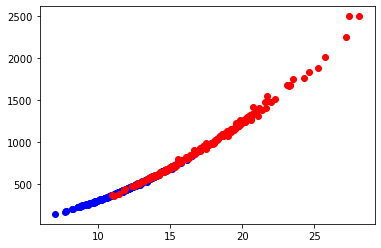

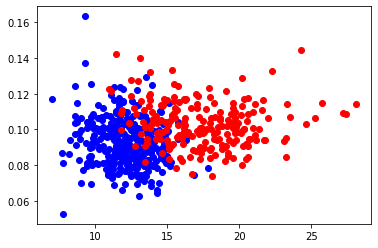

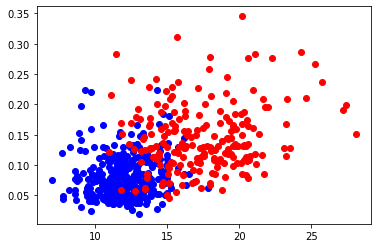

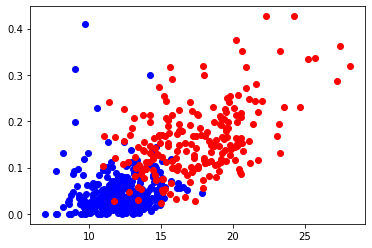

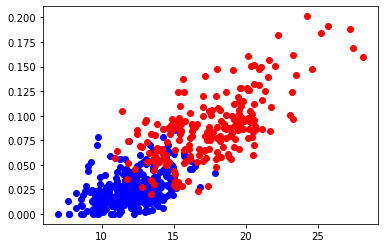

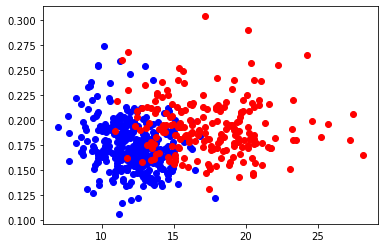

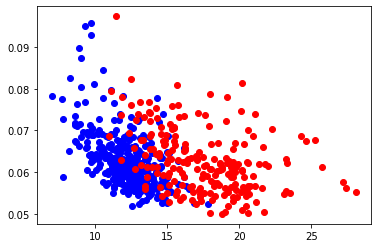

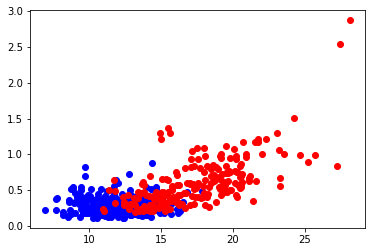

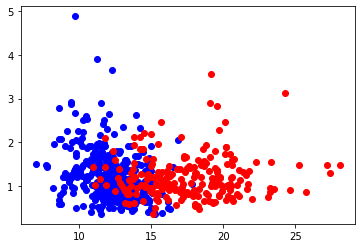

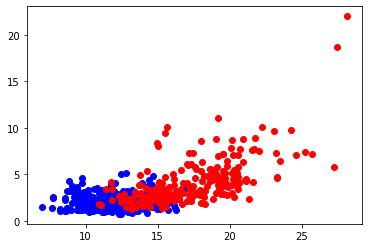

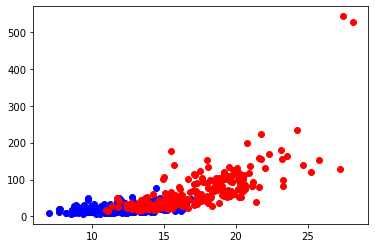

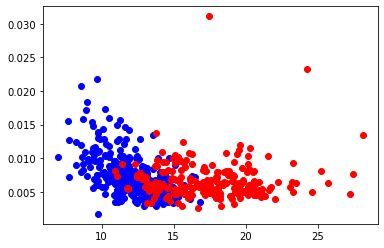

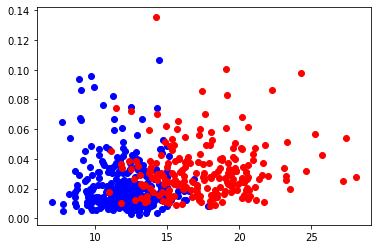

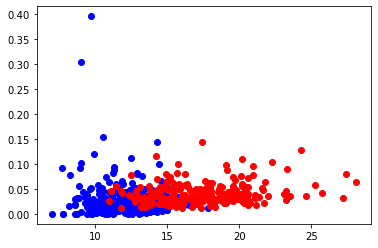

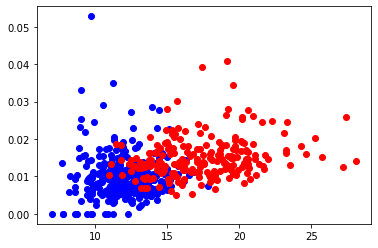

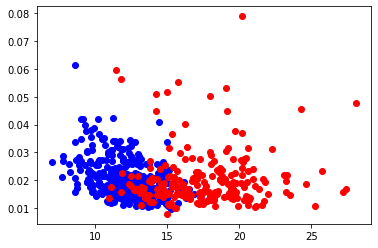

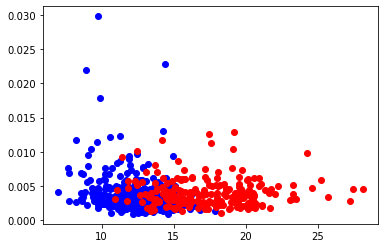

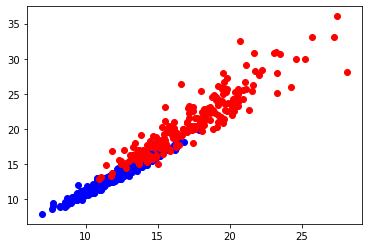

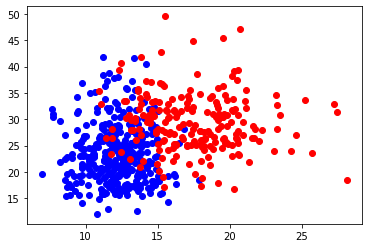

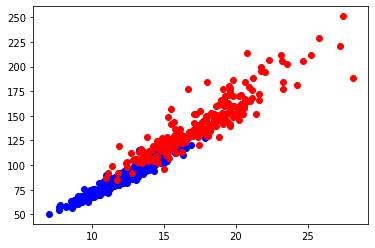

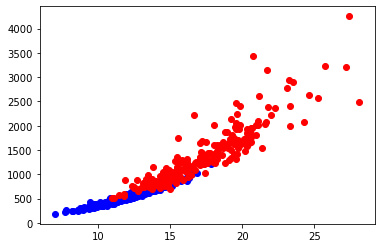

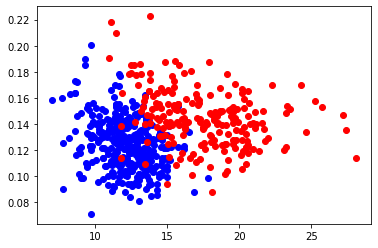

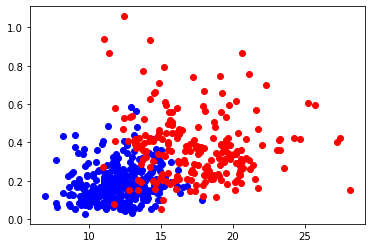

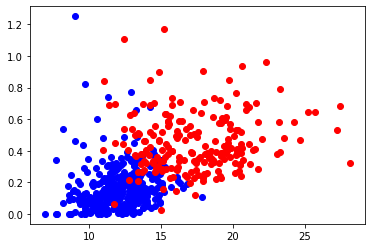

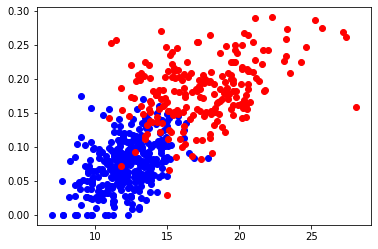

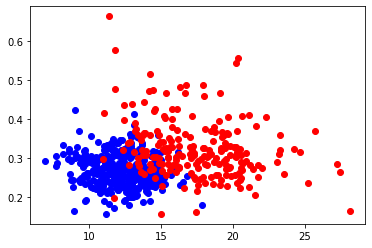

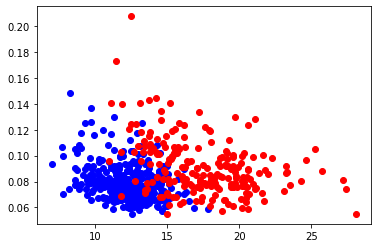

In [10]:
import random 
X_ , Y_ = df.drop(targetcol, axis=1), df[targetcol]
A_X = np.array(X_)
A_Y = np.array(Y_)
data = np.c_[A_X,A_Y]
data_nor = data[np.where(data[:,-1]==0)]
data_ano = data[np.where(data[:,-1]==1)]
for i in range(1,30):
    plt.scatter(data_nor[:,0],data_nor[:,i],c='b')
    plt.scatter(data_ano[:,0],data_ano[:,i],c='r')
    plt.show()

In [198]:
def distEculd(vector_a,vector_b):
    return np.sqrt(np.sum(np.power(vecrot_a - vector_b,2)))

def cos_sim(vector_a, vector_b):
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

def coe_sim(vector_a,vector_b):
    aa = np.corrcoef(vector_a,vector_b)
    return aa[0,1]

def get_simil(x,kind_similar):
    SIM = []
    for i in range(x.shape[1]):
        for j in range (i,x.shape[1]):
            if i == j: 
                continue
            sim = kind_similar(x[:,i],x[:,j])
            SIM.append(sim)
            number = np.array([(i,j)for i in range(x.shape[1]) for j in range (i,x.shape[1]) if i!=j])
    num_sim = np.column_stack((number,SIM))
    return num_sim
np.set_printoptions(threshold=np.inf)
sim_data=data[:,0:30]
RE = get_simil(sim_data,kind_similar=coe_sim)
# re = RE[:,2]
# N_point = np.array(list(range(len(re))))
# plt.scatter(N_point,re)
print(RE)
    

        

[[ 0.00000000e+00  1.00000000e+00  3.23781891e-01]
 [ 0.00000000e+00  2.00000000e+00  9.97855281e-01]
 [ 0.00000000e+00  3.00000000e+00  9.87357170e-01]
 [ 0.00000000e+00  4.00000000e+00  1.70581187e-01]
 [ 0.00000000e+00  5.00000000e+00  5.06123578e-01]
 [ 0.00000000e+00  6.00000000e+00  6.76763550e-01]
 [ 0.00000000e+00  7.00000000e+00  8.22528522e-01]
 [ 0.00000000e+00  8.00000000e+00  1.47741242e-01]
 [ 0.00000000e+00  9.00000000e+00 -3.11630826e-01]
 [ 0.00000000e+00  1.00000000e+01  6.79090388e-01]
 [ 0.00000000e+00  1.10000000e+01 -9.73174431e-02]
 [ 0.00000000e+00  1.20000000e+01  6.74171616e-01]
 [ 0.00000000e+00  1.30000000e+01  7.35863663e-01]
 [ 0.00000000e+00  1.40000000e+01 -2.22600125e-01]
 [ 0.00000000e+00  1.50000000e+01  2.05999980e-01]
 [ 0.00000000e+00  1.60000000e+01  1.94203623e-01]
 [ 0.00000000e+00  1.70000000e+01  3.76168956e-01]
 [ 0.00000000e+00  1.80000000e+01 -1.04320881e-01]
 [ 0.00000000e+00  1.90000000e+01 -4.26412691e-02]
 [ 0.00000000e+00  2.00000000e+

In [21]:
from scipy.fftpack import fft,ifft
from matplotlib.pylab import mpl
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


mpl.rcParams['font.sans-serif'] = ['SimHei']
N=len(A_X) #569
M=len(A_X[0])#30
# m=np.linspace(0,N,N)

# I = np.random.randint(0,30)
# fft_X1 = np.abs(fft(A_X[:,I]))/N
# print(I)
# plt.figure()
# plt.plot(m,A_X[:,I])
# plt.title('Original graphics_FI:')

# plt.figure()
# plt.plot(m,fft_X1)
# plt.title('Amplitude spectrum_FI')
fft_X = np.zeros([N,M])
fft_X_std = np.zeros(M)
for i in range(M):
    fft_X[:,i] = np.abs(fft(A_X[:,i]))/N
#     fft_X_std[i] = np.std(fft_X[:,i]) 
    fft_X_std[i] = np.mean(fft_X[:,i]) 



Matrix_dis = np.zeros([M,M])
for i in range(M):
    for j in range(M):
        if i == j:
            continue 
        Matrix_dis[i,j] = np.abs(fft_X_std[j]-fft_X_std[i])
#         Matrix_dis[i,j] = coe_sim(fft_X[:,j],fft_X[:,i])
    
clustering = AgglomerativeClustering(n_clusters=10)
clustering = clustering.fit(Matrix_dis)


# clustering = clustering.fit(A_X.T[])

clust_lable = clustering.fit_predict(Matrix_dis)
print(clust_lable)


[9 2 4 5 0 0 0 0 0 0 0 0 7 6 0 0 0 0 0 0 2 8 3 1 0 0 0 0 0 0]


In [33]:
import os 
os.getcwd()
TT = pd.DataFrame(Matrix_dis)
TT.to_csv('/Users/xuhaichao/Downloads/python1111/exshap_1/Isolation-Forest-for-Anomaly-Detection/dis_mat.csv')

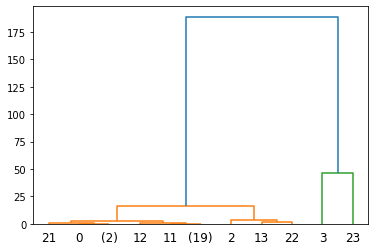

In [20]:
Clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
Clustering = Clustering.fit(Matrix_dis)
plot_dendrogram(Clustering, truncate_mode='level', p=4)

In [25]:
TT = pd.DataFrame(Matrix_dis)
with pd.option_context('display.max_rows', None, 'display.max_columns', df.shape[1]):
    print(TT)


            0          1          2          3          4          5  \
0    0.000000   0.032417   0.911460  14.134417   0.155163   0.153748   
1    0.032417   0.000000   0.879044  14.102000   0.187579   0.186165   
2    0.911460   0.879044   0.000000  13.222956   1.066623   1.065209   
3   14.134417  14.102000  13.222956   0.000000  14.289580  14.288165   
4    0.155163   0.187579   1.066623  14.289580   0.000000   0.001415   
5    0.153748   0.186165   1.065209  14.288165   0.001415   0.000000   
6    0.152744   0.185161   1.064204  14.287161   0.002419   0.001004   
7    0.154321   0.186738   1.065781  14.288738   0.000842   0.000573   
8    0.154520   0.186936   1.065980  14.288937   0.000643   0.000772   
9    0.155480   0.187897   1.066940  14.289897   0.000317   0.001732   
10   0.144832   0.177249   1.056292  14.279249   0.010331   0.008916   
11   0.133384   0.165801   1.044845  14.267801   0.021779   0.020364   
12   0.075611   0.108027   0.987071  14.210027   0.079552   0.07

In [153]:
np.shape(A_X)


(569, 30)

In [133]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
Features = data_nor[:,0:30].T
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(Features)
print(y_pred)



[0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0]


In [4]:
import numpy as np
import itertools
import bisect
import math
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, \
    confusion_matrix, f1_score, average_precision_score
import matplotlib.pyplot as plt
import sys
import time

from iforest import IsolationTreeEnsemble, find_TPR_threshold

def add_noise(df, n_noise):
    for i in range(n_noise):
        df[f'noise_{i}'] = np.random.normal(-2,2,len(df))


def pr_anomalies(X, y, sample_size=256, n_trees = 100, desired_TPR=None, percentile = None, normal_ymax=None, bins=20):
    N = len(X)
    it = IsolationTreeEnsemble(sample_size=sample_size, n_trees=n_trees)
    fit_start = time.time()
    it.fit(X)
    fit_stop = time.time()
    fit_time = fit_stop - fit_start
    score_start = time.time()
    scores = it.anomaly_score(X)
    score_stop = time.time()
    score_time = score_stop - score_start
    if desired_TPR is not None:
    
        threshold, FPR = find_TPR_threshold(y, scores, desired_TPR)
#         print(f"Computed {desired_TPR:.4f} TPR threshold {threshold:.4f} with FPR {FPR:.4f}")
    else:
        threshold = np.percentile(scores, percentile)
    y_pred = it.predict_from_anomaly_scores(scores, threshold=threshold)
    confusion = confusion_matrix(y, y_pred)

    TN, FP, FN, TP = confusion.flat
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    normal = scores[y==0]

    anomalies = scores[y==1]
    F1 = f1_score(y, y_pred)
    PR = average_precision_score(y, scores)

    return PR

def calculatShapley(cFunction,coalition,nPlayer):
    coalition=list(coalition)
    for i in range(0,len(coalition)):
        coalition[i]=list(coalition[i])

    stat = time.time()
#     print("start calculate shapley:")
    shapley_values = []
    for i in range(len(nPlayer)):
        shapley = 0
        for j in coalition:
            if i not in j:
                j=list(j)
                cmod = len(j)
                Cui = j[:]
                bisect.insort_left(Cui,i)
                l = coalition.index(j)
                k = coalition.index(Cui)
                temp = float(float(cFunction[k]) - float(cFunction[l])) *\
                           float(math.factorial(cmod) * math.factorial(len(nPlayer) - cmod - 1)) / float(math.factorial(len(nPlayer)))
                shapley += temp
                # if i is 0:
                #     print j, Cui, cmod, n-cmod-1, characteristic_function[k], characteristic_function[l], math.factorial(cmod), math.factorial(n - cmod - 1), math.factorial(n)

        cmod = 0
        Cui = [i]
        k = coalition.index(Cui)
        temp = float(cFunction[k]) * float(math.factorial(cmod) * math.factorial(len(nPlayer) - cmod - 1)) / float(math.factorial(len(nPlayer)))
        shapley += temp

        shapley_values.append(shapley)
    end_time = time.time()
    T_time = end_time-stat
#     print(f"time {time_cacul:3.2f}s")
    return (shapley_values)



def getcoaltionlist(n):
    coalition=[]
    singles = tuple([i for i in range(n)])
    for i in range(1, n+1):
        for p in itertools.combinations(singles, i):
            coalition.append(p)
            # if i==2:
            #     print(p)
    return coalition



if __name__ == '__main__': 

    datafile = 'cancer.csv'

    targetcol = 'diagnosis'
    
    sample_size = int(5)
    n_trees = int(1000)
    desired_TPR = int(100)
    desired_TPR /= 100.0
    Phi_2Level = []
    X, y = df.drop(targetcol, axis=1), df[targetcol]

    df_list=np.array(X)
    Tm = df_list[:,0:30]
    Tm1 = df_list[:,0:30]
    n=3
    num_group = int(len(Tm[1])/3)
    coalition_2level = getcoaltionlist(n)
    player_2level = [0,1,2]
    tm_list = []
    for i in range(1,n+1):
        tm = Tm[:,(i-1)*num_group:i*num_group].reshape(-1,num_group)
        pr = pr_anomalies(tm,y,n_trees=n_trees,desired_TPR=desired_TPR)
        Phi_2Level.append(pr)
        tm_list.append(tm)
        tm_np = np.array(tm_list)
    for pair in coalition_2level[n:]:
        idx = [i for i in pair]
        t = tm_np[idx].shape[0]
        np_tuple = tuple([tm_np[i] for i in range(t)])
#         print(len(np_tuple))
        tm = np.concatenate(np_tuple,axis=1)
        pr = pr_anomalies(tm,y,n_trees=n_trees,desired_TPR=desired_TPR)
        Phi_2Level.append(pr)

    
    Shap_2level = calculatShapley(Phi_2Level,coalition_2level,player_2level)
    print(Shap_2level)


[0.22762346329397035, 0.16880485557292746, 0.2596931171628899]


In [6]:
    l1_group = [0,1,2,3,4,5,6,7,8,9]
    coalition_1level = getcoaltionlist(10)
    X, y = df.drop(targetcol, axis=1), df[targetcol]
    df_list2=np.array(X)
    Tm1 = df_list2[:,0:30].copy()
    Phi_1level = []
    start_time = time.time()
    for i in range(1,n+1):
        print(i)
        c = Tm1[:,(i-1)*num_group:i*num_group].reshape(-1,num_group)
        for k in range(0,len(coalition_1level)):
            pl_1level = c.copy()
            diff = set(l1_group) ^ set(coalition_1level[k])
            if (len(diff) != 0):
                pl_1level[:,list(diff)] = np.zeros(np.shape(pl_1level[:, list(diff)]))
                pr = pr_anomalies(pl_1level,y,n_trees=n_trees,desired_TPR=desired_TPR)
            else:
                pr = pr_anomalies(c,y,n_trees=n_trees,desired_TPR=desired_TPR)    
            Phi_1level .append(pr)
    stop_time = time.time()
    time_cacul = stop_time - start_time
    print(f"time {time_cacul:3.2f}s")

1
2
3
time 2043.00s


In [13]:
Shap_1level_1 = calculatShapley(Phi_1level[0:1023],coalition_1level,l1_group)
Shap_1level_2 = calculatShapley(Phi_1level[1023:2046],coalition_1level,l1_group)
Shap_1level_3 = calculatShapley(Phi_1level[2046:3069],coalition_1level,l1_group)
Shap = abs(np.r_[np.array(Shap_1level_1)*Shap_2level[0],np.array(Shap_1level_2)*Shap_2level[1], \
             np.array(Shap_1level_1)*Shap_2level[0]])
S = sum(Shap)
Shap_fit = Shap/ S
print(Shap_fit)



[0.05285319 0.00478257 0.0580358  0.07526806 0.00076416 0.04476557
 0.05928983 0.06690924 0.00894091 0.0119271  0.06056001 0.00315761
 0.05138426 0.06662906 0.00066835 0.01435382 0.00550932 0.009557
 0.0169399  0.00416782 0.05285319 0.00478257 0.0580358  0.07526806
 0.00076416 0.04476557 0.05928983 0.06690924 0.00894091 0.0119271 ]


In [60]:
def distEculd(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB,2)))

def cos_sim(vector_a, vector_b):
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

def randCent(dataSet,k):
    
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))
    
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        array2 = minJ + rangeJ * np.random.rand(k,1)
        centroids[:,j] = np.mat(array2)
    return centroids

def kmeans(dataSet , k , distMeas = cos_sim,createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet,k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
#             print("i",i)
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
#                 print('j',j)
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
#                 print("pan duan")
            clusterAssment[i,:] = minIndex,minDist
        
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            if len(ptsInClust) !=0 : 
                centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids,clusterAssment




(30, 569)
(30, 2)
[[ 2.32877445e+04 -1.41038957e+03]
 [-1.40091720e+03 -1.78368307e+01]
 [ 1.59379372e+04  1.90982083e+03]]
[[1.00000000e+00 6.12716308e+01]
 [1.00000000e+00 1.52240160e+02]
 [1.00000000e+00 1.93799954e+03]
 [2.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.82198221e+02]
 [1.00000000e+00 2.81771995e+02]
 [1.00000000e+00 2.81795638e+02]
 [1.00000000e+00 2.82887632e+02]
 [1.00000000e+00 2.80379686e+02]
 [1.00000000e+00 2.82959391e+02]
 [1.00000000e+00 2.73511855e+02]
 [1.00000000e+00 2.58884951e+02]
 [1.00000000e+00 2.07869943e+02]
 [1.00000000e+00 1.01968398e+03]
 [1.00000000e+00 2.84127190e+02]
 [1.00000000e+00 2.83688737e+02]
 [1.00000000e+00 2.83525514e+02]
 [1.00000000e+00 2.83995741e+02]
 [1.00000000e+00 2.83841009e+02]
 [1.00000000e+00 2.84191338e+02]
 [1.00000000e+00 1.11303731e+02]
 [1.00000000e+00 2.86672825e+02]
 [1.00000000e+00 2.34009360e+03]
 [0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.81432280e+02]
 [1.00000000e+00 2.78218634e+02]
 [1.00000000e+00 2

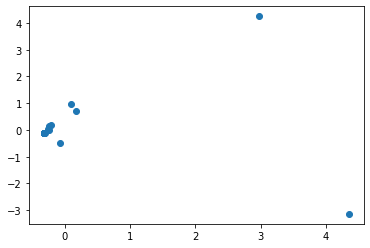

In [61]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec
from sklearn.decomposition import PCA
np.seterr(divide='ignore',invalid='ignore')
pca = PCA(n_components=2)
data_train = A_X[:,0:30].T
print(data_train.shape)
dataMat1 = np.mat(pca.fit_transform(data_train))
print(dataMat1.shape)
ss=StandardScaler()
std_dataMat1 = ss.fit_transform(dataMat1)
plt.scatter(np.array(std_dataMat1[:,0]),np.array(std_dataMat1[:,1]))
k = 3
centroids,clusterAssment = kmeans(dataMat1, k, distMeas=distEculd , createCent=randCent)
print (centroids)
print (clusterAssment)


fit time 0.04s
score time 0.02s


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Computed 0.8000 TPR threshold 0.4770 with FPR 0.2437
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7028, avg PR 0.7786


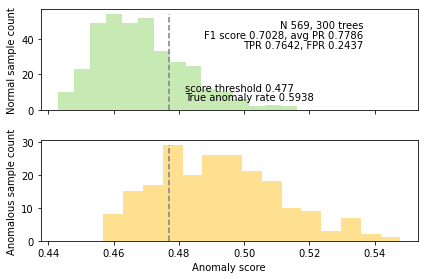

In [9]:
import numpy as np
import itertools
import bisect
import math
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, \
    confusion_matrix, f1_score, average_precision_score
import matplotlib.pyplot as plt
import sys
import time

from iforest import IsolationTreeEnsemble, find_TPR_threshold

# def add_noise(df, n_noise):
#     for i in range(n_noise):
#         df[f'noise_{i}'] = np.random.normal(-2,2,len(df))


def plot_anomalies(X, y, sample_size=256, n_trees = 100, desired_TPR=None, percentile = None, normal_ymax=None, bins=20):
    N = len(X)
    # print("____________",X)
    it = IsolationTreeEnsemble(sample_size=sample_size, n_trees=n_trees)

    fit_start = time.time()
    it.fit(X)
    # print("************",X)
    fit_stop = time.time()
    fit_time = fit_stop - fit_start
    print(f"fit time {fit_time:3.2f}s")

    score_start = time.time()
    scores = it.anomaly_score(X)
    # print("这里是scores:",scores)
    score_stop = time.time()
    score_time = score_stop - score_start
    print(f"score time {score_time:3.2f}s")

    if desired_TPR is not None:
        threshold, FPR = find_TPR_threshold(y, scores, desired_TPR)
        print(f"Computed {desired_TPR:.4f} TPR threshold {threshold:.4f} with FPR {FPR:.4f}")
    else:
        threshold = np.percentile(scores, percentile)
    y_pred = it.predict_from_anomaly_scores(scores, threshold=threshold)
    confusion = confusion_matrix(y, y_pred)
    # print(confusion)

    TN, FP, FN, TP = confusion.flat
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    normal = scores[y==0]
    anomalies = scores[y==1]
    F1 = f1_score(y, y_pred)
    PR = average_precision_score(y, scores)
    print(f"Proportion anomalies/normal = {len(anomalies)}/{len(normal)} = {(len(anomalies)/len(normal))*100:.1f}%")
    print(f"F1 score {F1:.4f}, avg PR {PR:.4f}")

    fig, axes = plt.subplots(2, 1, sharex=True)


    counts0, binlocs0, _ = axes[0].hist(normal, color='#c7e9b4', bins=bins)
    counts1, binlocs1, _ = axes[1].hist(anomalies, color='#fee090', bins=bins)
    # print("COUNTS0:", counts0)
    # print("BINLOCS0:",binlocs0)
    # print("COUNTS1:", counts1)
    # print("BINLOCS1:",binlocs1)
    axes[1].set_xlabel("Anomaly score")
    axes[0].set_ylabel("Normal sample count")
    axes[1].set_ylabel("Anomalous sample count")
    axes[0].plot([threshold,threshold],[0,max(counts0)], '--', color='grey')
    axes[1].plot([threshold,threshold],[0,max(counts1)], '--', color='grey')
    text_xr = 0.97 * axes[0].get_xlim()[1]
    axes[0].text(text_xr, .85 * max(counts0), f"N {N}, {n_trees} trees", horizontalalignment='right')
    axes[0].text(text_xr, .75 * max(counts0), f"F1 score {F1:.4f}, avg PR {PR:.4f}", horizontalalignment='right')
    axes[0].text(text_xr, .65 * max(counts0), f"TPR {TPR:.4f}, FPR {FPR:.4f}", horizontalalignment='right')
    axes[0].text(threshold+.005, .20 * max(counts0), f"score threshold {threshold:.3f}")
    axes[0].text(threshold+.005, .10 * max(counts0), f"True anomaly rate {len(anomalies) / len(normal):.4f}")
    if normal_ymax is not None:
        axes[0].set_ylim(0, normal_ymax)
    plt.tight_layout()
    plt.savefig(f"{datafile.split('.')[0]}-{n_trees}-{int(desired_TPR*100)}.svg",
                bbox_inches='tight',
                pad_inches=0)
    # plt.show()
    return F1

if __name__ == '__main__': # dask seems to need this
    # launch with "python plot_anomalies.py http.csv attack 20000 256 100 99"
    # or, "python plot_anomalies.py cancer.csv diagnosis all 5 1000 80

    # datafile = sys.argv[1]
    # targetcol = sys.argv[2]
    # sample_size = int(sys.argv[4])
    # n_trees = int(sys.argv[5])
    # desired_TPR = int(sys.argv[6])
    datafile = 'cancer.csv'

    targetcol = 'diagnosis'
    sample_size = int(5)
    n_trees = int(300)
    desired_TPR = int(80)
    desired_TPR /= 100.0

#     df = pd.read_csv(datafile)
#     df_list=np.array(df)
#     print(np.shape(df_list))
#     tm = df_list[:,0:30]
#     tm1=df_list[:,0:10].reshape(-1,10)
#     tm2=df_list[:,10:20].reshape(-1,10)
#     tm3=df_list[:,20:30].reshape(-1,10)

    # a1=data_split(tm1).reshape(-1,1)
    # a2=data_split(tm2).reshape(-1,1)
    # a3=data_split(tm3).reshape(-1,1)
    # layer_1 = np.concatenate((tm1,tm2,tm3),axis=1)
#     layer1_F1 = plot_anomalies(tm1, df_list[:,-1], sample_size=sample_size, n_trees=n_trees, desired_TPR=desired_TPR, bins=15)
#     layer2_F1 = plot_anomalies(tm2, df_list[:,-1], sample_size=sample_size, n_trees=n_trees, desired_TPR=desired_TPR, bins=15)
#     layer3_F1 = plot_anomalies(tm2, df_list[:,-1], sample_size=sample_size, n_trees=n_trees, desired_TPR=desired_TPR, bins=15)
#     S1= np.array([layer1_F1,layer2_F1,layer3_F1])
#     print(S1)
#     # print(df_list[:,-1])
#     subset = get_subsets([0,1,2])
#     sb1=[tuple(x) for x in subset]
#     print(sb1)
#     Shape_1 = calculatShapley(S1,sb1,[0,1,2])
    # print(getcoaltionlist())
    # item3='all'
    # if item3=='all':
    #     N = len(df)
    # else:
    #     N = int(item3)
    #
    # if sys.argv[3]=='all':
    #     N = len(df)
    # else:
    #     N = int(sys.argv[3])

#     df = df.sample(N)  # grab random subset (too slow otherwise)

    X, y = df.drop(targetcol, axis=1), df[targetcol]

    plot_anomalies(X, y, sample_size=sample_size, n_trees=n_trees, desired_TPR=desired_TPR, bins=15)

